In [1]:
# Load Important libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical 

In [3]:
import kagglehub

data = kagglehub.dataset_download("alxmamaev/flowers-recognition")

print("Path to dataset files:", data)

100%|███████████████████████████████████████████████████████████████████████████████| 225M/225M [00:54<00:00, 4.29MB/s]

Extracting files...


Path to dataset files: C:\Users\keshav\.cache\kagglehub\datasets\alxmamaev\flowers-recognition\versions\2


In [2]:
import os
import tensorflow as tf
from tensorflow import keras 
from keras import Sequential 
from keras.layers import Dense,Conv2D,Flatten,BatchNormalization,Dropout,MaxPooling2D

In [3]:
# Path to the extracted folder containing the image organised by class:
dataset_dir = "C:\\Users\\keshav\\OneDrive\\Desktop\\Flower_Classification\\archive (2)\\flowers"

In [4]:
# Loading the dataset, resizing the image to a fixed size
train_dataset= tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    image_size=[255,255],
    batch_size=32,
    label_mode='int',
    shuffle= True,
    validation_split= 0.2,
    subset= "training",
    seed= 123
)

# Loading the Validation Dataset (Using Same Directory & Split)
val_dataset= tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    image_size=[255,255],
    batch_size=32,
    label_mode='int',
    shuffle= True,
    validation_split= 0.2,
    subset= "validation",
    seed= 123
)

# Optimize with prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)

print("Datasets loaded successfully!")

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.
Datasets loaded successfully!


In [5]:
# Extract X (images) and Y (labels)
trainX, trainY = zip(*[(x, y) for x, y in train_dataset])
testX, testY = zip(*[(x, y) for x, y in val_dataset])

# Convert to TensorFlow tensors
trainX = tf.concat(trainX, axis=0)
trainY = tf.concat(trainY, axis=0)
testX = tf.concat(testX, axis=0)
testY = tf.concat(testY, axis=0)

print(f"TrainX shape: {trainX.shape}, TrainY shape: {trainY.shape}")
print(f"TestX shape: {testX.shape}, TestY shape: {testY.shape}")

TrainX shape: (3454, 255, 255, 3), TrainY shape: (3454,)
TestX shape: (863, 255, 255, 3), TestY shape: (863,)


In [ ]:
print(f"TrainX shape: {trainX.shape}, TrainY shape: {trainY.shape}")
print(f"TestX shape: {testX.shape}, TestY shape: {testY.shape}")

In [6]:
# Inspect the first batch of images & labels
for images,labels in train_dataset.take(1):
    print(images.shape, labels.shape)

(32, 255, 255, 3) (32,)


In [12]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 255, 255, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
data_list = list(train_dataset.as_numpy_iterator())

In [14]:
data_list

[(array([[[[2.54587433e+02, 2.54587433e+02, 2.54587433e+02],
           [2.54000000e+02, 2.54000000e+02, 2.54000000e+02],
           [2.54513611e+02, 2.54513611e+02, 2.54513611e+02],
           ...,
           [2.54598053e+02, 2.54598053e+02, 2.54598053e+02],
           [2.53558838e+02, 2.53558838e+02, 2.53558838e+02],
           [2.55000000e+02, 2.55000000e+02, 2.55000000e+02]],
  
          [[2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
           [2.54236679e+02, 2.54236679e+02, 2.54236679e+02],
           [2.53829758e+02, 2.53829758e+02, 2.53829758e+02],
           ...,
           [2.54344757e+02, 2.54344757e+02, 2.54344757e+02],
           [2.53745682e+02, 2.53745682e+02, 2.53745682e+02],
           [2.55000000e+02, 2.55000000e+02, 2.55000000e+02]],
  
          [[2.54294113e+02, 2.54294113e+02, 2.54294113e+02],
           [2.54164352e+02, 2.54164352e+02, 2.54164352e+02],
           [2.53598038e+02, 2.53598038e+02, 2.53598038e+02],
           ...,
           [2.54000000e+02, 2

In [8]:
# Scaling 
trainX= trainX/255
testX= testX/255

In [9]:
labels=["daisy", "dandelion", "rose", "sunflower", "tulip"]

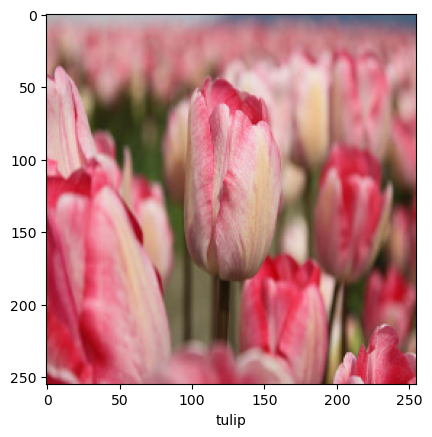

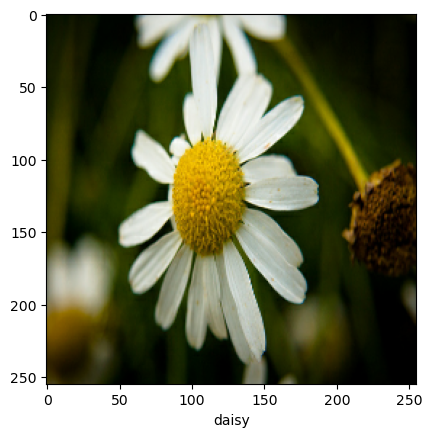

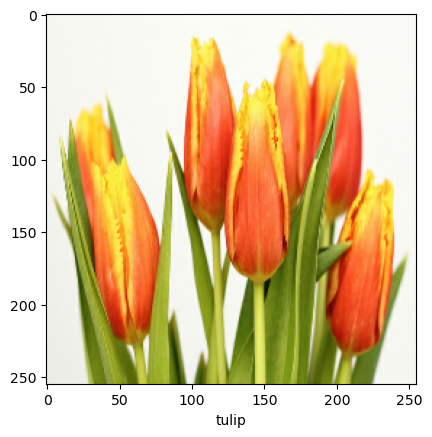

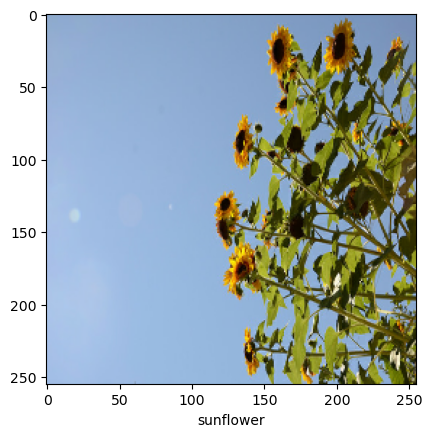

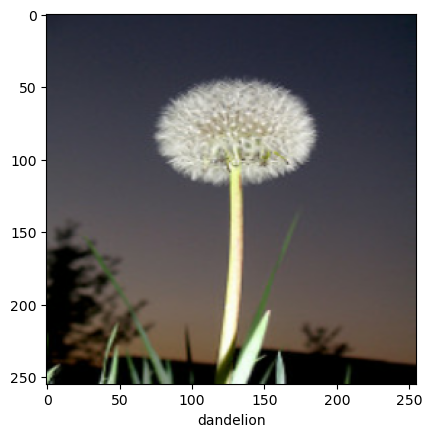

In [10]:
for i in range(200,205):
    plt.imshow(trainX[i])
    plt.xlabel(labels[int(trainY[i])])
    plt.show()

In [9]:
trainY= to_categorical(trainY)
testY= to_categorical(testY)

ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [14]:
trainY[0:5]

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([2, 4, 4, 1, 3])>

In [18]:
trainX[0:3]

<tf.Tensor: shape=(3, 255, 255, 3), dtype=float32, numpy=
array([[[[0.6117647 , 0.34901962, 0.13333334],
         [0.5545559 , 0.37404844, 0.26562858],
         [0.7697809 , 0.7009228 , 0.7099193 ],
         ...,
         [0.19273359, 0.2560554 , 0.24256054],
         [0.19573238, 0.26239905, 0.23817755],
         [0.19215687, 0.25882354, 0.22745098]],

        [[0.5400692 , 0.34560552, 0.1504037 ],
         [0.4517321 , 0.32705474, 0.2251116 ],
         [0.55037653, 0.50993556, 0.5153172 ],
         ...,
         [0.1893195 , 0.25264132, 0.23914646],
         [0.1923183 , 0.25898498, 0.23476347],
         [0.18874279, 0.25540945, 0.2240369 ]],

        [[0.43252593, 0.3314879 , 0.16770473],
         [0.31558448, 0.26502472, 0.17401452],
         [0.26649025, 0.26134744, 0.26119822],
         ...,
         [0.18485652, 0.24817833, 0.23468347],
         [0.18763821, 0.2543049 , 0.23008338],
         [0.18385237, 0.25051904, 0.21914649]],

        ...,

        [[0.14048444, 0.16747406, 

In [11]:
model= Sequential()

In [12]:
model.add(Conv2D(8,(4,4), input_shape=(255,255,3), padding="same"))
model.add(Conv2D(16,(5,5), padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(50, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()

C:\Users\keshav\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 255, 255, 8)         │             392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 255, 255, 16)        │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 258064)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │      12,903,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,907,368 (49.24 MB)

 Trainable params: 12,907,368 (49.24 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss="SparseCategoricalCrossentropy", optimizer="RMSProp", metrics=["accuracy"])

In [15]:
hist= model.fit(trainX, trainY, batch_size=50, epochs=20)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.2550 - loss: 16.4968
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.3919 - loss: 1.8928
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.5548 - loss: 1.2708
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.7025 - loss: 0.8433
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.8200 - loss: 0.5116
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 509s 7s/step - accuracy: 0.9053 - loss: 0.2830
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.9451 - loss: 0.2115
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 218s 3s/step - accuracy: 0.9636 - loss: 0.1205
Epoch 9/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.9365 - loss: 0.2566
Epoch 10/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.9830 - loss: 0.0570
Epoch 11/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.9882 - loss: 0.0467
Epoch 12/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy

In [16]:
# PRediction 
y_pred= model.predict(testX)
print(y_pred)

27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 476ms/step
[[1.08352594e-01 1.42717955e-03 3.62246850e-04 ... 1.96053650e-16
  2.03242991e-17 6.64970133e-19]
 [2.05087041e-08 2.89766444e-03 1.10263035e-01 ... 1.27212421e-21
  3.13746666e-24 2.30845984e-24]
 [1.85302537e-11 1.00000000e+00 1.43581232e-11 ... 6.57735271e-16
  8.46026235e-22 1.08327763e-21]
 ...
 [7.09813008e-08 1.22333450e-08 1.25191213e-09 ... 8.71590563e-24
  3.25078076e-29 2.35982501e-27]
 [3.61048980e-15 1.77745498e-03 9.97876763e-01 ... 2.19780400e-17
  4.27232044e-27 7.61154469e-23]
 [5.55565675e-05 6.18289996e-05 2.96018156e-03 ... 3.11629338e-29
  3.03044997e-33 9.41467742e-28]]


In [17]:
y_pred[0]

array([1.08352594e-01, 1.42717955e-03, 3.62246850e-04, 1.42909924e-03,
       8.88428926e-01, 2.32054396e-15, 9.86616698e-18, 1.96053650e-16,
       2.03242991e-17, 6.64970133e-19], dtype=float32)

In [19]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[0:5]

[4, 4, 1, 0, 3]

In [20]:
y_test_labels=[np.argmax(i) for i in testY]
y_test_labels[0:5]

[0, 0, 0, 0, 0]

0.12514484356894554
              precision    recall  f1-score   support

           0       1.00      0.13      0.22       863
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.13       863
   macro avg       0.20      0.03      0.04       863
weighted avg       1.00      0.13      0.22       863



C:\Users\keshav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\keshav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\keshav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

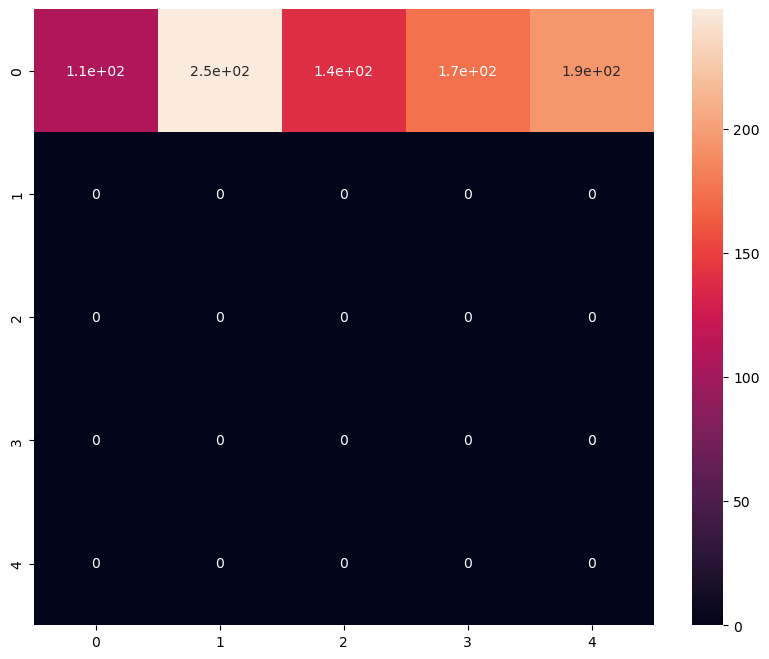

In [26]:
#Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm= confusion_matrix(y_test_labels, y_pred_labels)
print(accuracy_score(y_test_labels, y_pred_labels))
print(classification_report(y_test_labels, y_pred_labels))

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True)

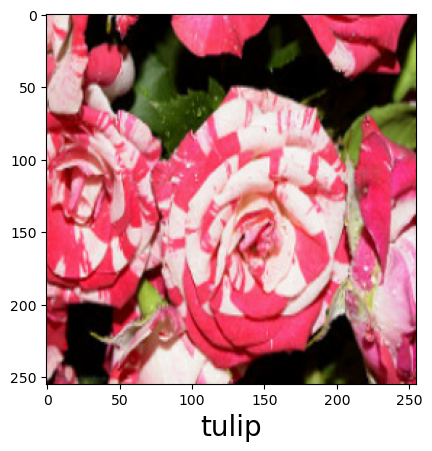

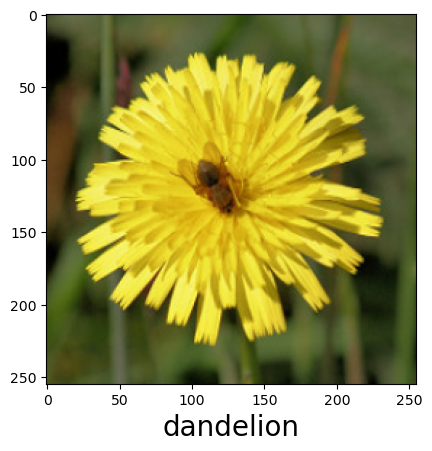

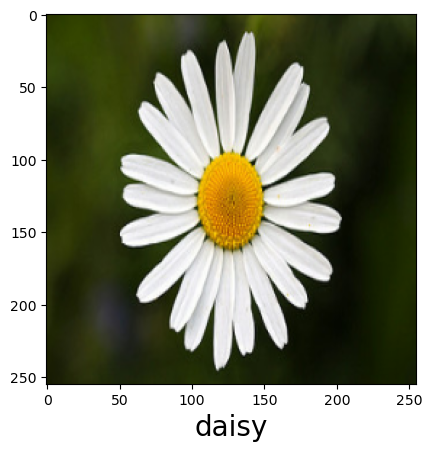

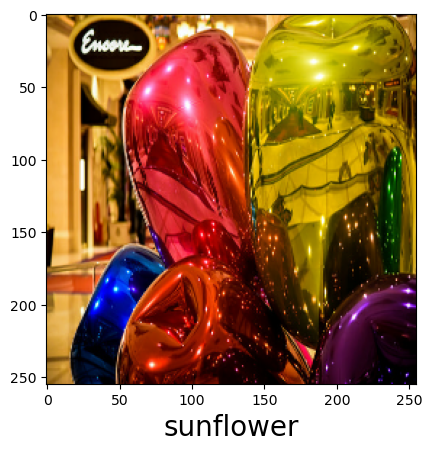

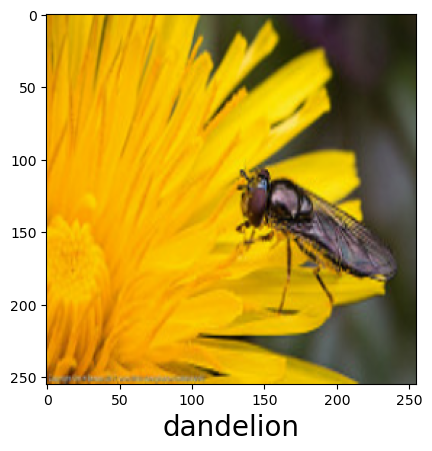

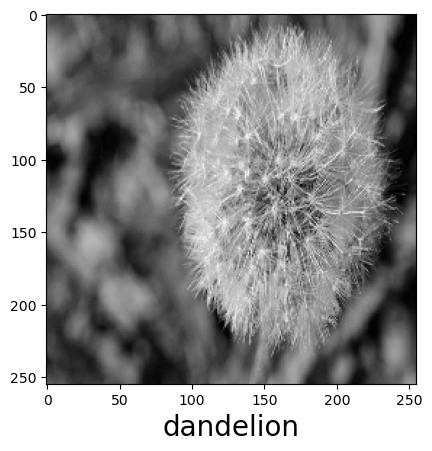

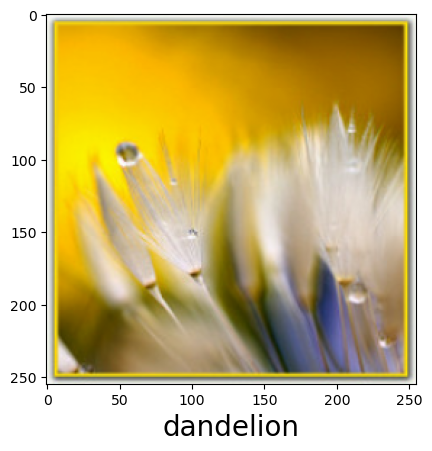

In [23]:
for i in range(1,8):
    plt.imshow(testX[i])
    plt.xlabel(labels[int(y_pred_labels[i])], fontsize=20)
    plt.show()